**Table of contents**<a id='toc0_'></a>    
- [데이터 둘러보기](#toc1_)    
  - [Feature 요약표](#toc1_1_)    
- [데이터 시각화](#toc2_)    
  - [타겟 값 분포](#toc2_1_)    
  - [sleep_period_id](#toc2_2_)    
  - [연속형 feature](#toc2_3_)    
  - [연속형 feature 2 - 피처 간 상관관계](#toc2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [40]:
import pandas as pd

train_path = './data/train/'
test_path = './data/validation/'

train_label = pd.read_csv(train_path + 'label/1.걸음걸이/training_label.csv')
train = pd.read_csv(train_path + 'raw/train_sleep.csv')

test_label = pd.read_csv(test_path + 'label/1.걸음걸이/val_label.csv')
test = pd.read_csv(test_path + 'raw/val_sleep.csv')

In [ ]:
# label 과 합치기
train = train.merge(train_label, left_on='EMAIL', right_on='SAMPLE_EMAIL')
test = test.merge(test_label, left_on='EMAIL', right_on='SAMPLE_EMAIL')

train.drop(columns=['SAMPLE_EMAIL'], inplace=True)
test.drop(columns=['SAMPLE_EMAIL'], inplace=True)

# <a id='toc1_'></a>[데이터 둘러보기](#toc0_)

In [42]:
train.shape, test.shape

((9705, 37), (2478, 37))

In [ ]:
train.head().T

0  \
EMAIL                                                                      nia+279@rowan.kr   
sleep_awake                                                                            8700   
sleep_bedtime_end                                                 2020-10-19T05:10:28+09:00   
sleep_bedtime_start                                               2020-10-18T18:38:28+09:00   
sleep_breath_average                                                                 17.875   
sleep_deep                                                                            10110   
sleep_duration                                                                        37920   
sleep_efficiency                                                                         77   
sleep_hr_5min                                                                           ...   
sleep_hr_average                                                                      53.04   
sleep_hr_lowest                                                                          49   
sleep_hypnogram_5min                                                                    ...   
sleep_is_longest                                                                          1   
sleep_light                                                                           15330   
sleep_midpoint_at_delta                                                               84928   
sleep_midpoint_time                                                                   17820   
sleep_onset_latency                                                                     630   
sleep_period_id                                                                           0   
sleep_rem                                                                              3780   
sleep_restless                                                                           24   
sleep_rmssd                                                                              39   
sleep_rmssd_5min                                                                        ...   
sleep_score                                                                              84   
sleep_score_alignment                                                                    87   
sleep_score_deep                                                                        100   
sleep_score_disturbances                                                                 78   
sleep_score_efficiency                                                                   65   
sleep_score_latency                                                                      89   
sleep_score_rem                                                                          56   
sleep_score_total                                                                        94   
sleep_temperature_delta                                                                 0.0   
sleep_temperature_deviation                                                             0.0   
sleep_total                                                                           29220   
CONVERT(sleep_hr_5min USING utf8)         63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/...   
CONVERT(sleep_hypnogram_5min USING utf8)  4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/...   
CONVERT(sleep_rmssd_5min USING utf8)      18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/...   
DIAG_NM                                                                                 MCI   

                                                                                          1  \
EMAIL                                                                      nia+279@rowan.kr   
sleep_awake                                                                            6570   
sleep_bedtime_end                                                 2020-10-20T05:37:52+09:00   
sleep_bedtime_start                                               2020-10-19T21:39:52+09:00   
slee

## <a id='toc1_1_'></a>[Feature 요약표](#toc0_)

In [103]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = df.isna().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if col == 'sleep_period_id':
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == 'float' or df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif 'time' in col:
            summary.loc[col, '데이터 종류'] = '날짜형'
    return summary

In [104]:
summary = resumetable(train)
summary

데이터셋 형상: (9705, 37)


데이터 타입  결측값 개수  고유값 개수 데이터 종류
EMAIL                                       object       0     141   None
sleep_awake                                  int64       0     611    연속형
sleep_bedtime_end                           object       0    9667    날짜형
sleep_bedtime_start                         object       0    9681    날짜형
sleep_breath_average                       float64       0      71    연속형
sleep_deep                                   int64       0     454    연속형
sleep_duration                               int64       0     637    연속형
sleep_efficiency                             int64       0      57    연속형
sleep_hr_5min                               object       0       1   None
sleep_hr_average                           float64       0    2905    연속형
sleep_hr_lowest                              int64       0      51    연속형
sleep_hypnogram_5min                        object       0       1   None
sleep_is_longest                             int64       0       1    연속형
sleep_light                                  int64       0     811    연속형
sleep_midpoint_at_delta                      int64       0    7166    연속형
sleep_midpoint_time                          int64       0     723    연속형
sleep_onset_latency                          int64       0     159    연속형
sleep_period_id                              int64       0       8    명목형
sleep_rem                                    int64       0     363    연속형
sleep_restless                               int64       0      79    연속형
sleep_rmssd                                  int64       0     125    연속형
sleep_rmssd_5min                            object       0       1   None
sleep_score                                  int64       0      71    연속형
sleep_score_alignment                        int64       0      97    연속형
sleep_score_deep                             int64       0      97    연속형
sleep_score_disturbances                     int64       0      75    연속형
sleep_score_efficiency                       int64       0      52    연속형
sleep_score_latency                          int64       0      51    연속형
sleep_score_rem                              int64       0     100    연속형
sleep_score_total                            int64       0      81    연속형
sleep_temperature_delta                    float64       0     274    연속형
sleep_temperature_deviation                float64       0     274    연속형
sleep_total                                  int64       0     924    연속형
CONVERT(sleep_hr_5min USING utf8)           object       0    9705   None
CONVERT(sleep_hypnogram_5min USING utf8)    object       0    9705   None
CONVERT(sleep_rmssd_5min USING utf8)        object       0    9705   None
DIAG_NM                                   category       0       3   None

In [8]:
log_data_columns = ['sleep_hr_5min', 'sleep_rmssd_5min', 'sleep_hypnogram_5min']
for column in log_data_columns:
    print(f'{column} 고윳값: {train[column].unique()}')

sleep_hr_5min 고윳값: ['...']
sleep_rmssd_5min 고윳값: ['...']
sleep_hypnogram_5min 고윳값: ['...']


In [9]:
print('sleep_period_id 고윳값:', train['sleep_period_id'].unique())

sleep_period_id 고윳값: [0 1 3 2 4 5 6 7]


In [ ]:
print('sleep_is_longest 고윳값:', train['sleep_is_longest'].unique())

sleep_is_longest 고윳값: [1]


# <a id='toc2_'></a>[데이터 시각화](#toc0_)

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.gridspec as gridspec
import matplotlib as mpl

sns.set_theme(
    style="whitegrid",      # 스타일: "white", "dark", "whitegrid", "darkgrid", "ticks"
    palette="pastel",       # 색상 팔레트
    font_scale=1.2          # 글꼴 크기 비율
)

import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if 'Apple' in f.name]
plt.rc('font', family='AppleGothic')  

In [ ]:
def write_percent(ax, total_size):
    '''
    도형 객체를 순회하며 막대 상단에 타겟값 비율 표시
    '''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width()
        left_coord = patch.get_x() # 도형 왼쪽 좌표
        percentage = height/total_size*100 # 타겟값 비율
        
        ax.text(left_coord + width/2.0, # x축 위치
                height + total_size*0.001, # y축 위치
                f'{percentage:.2f}%', # 입력 텍스트
                ha='center') # 텍스트 가운데 정렬

## <a id='toc2_1_'></a>[타겟 값 분포](#toc0_)

In [49]:
from pandas.api.types import CategoricalDtype

diag_nm_order = ['CN', 'MCI', 'Dem']

# 순서를 지정한 범주형 데이터 타입
diag_nm_type = CategoricalDtype(categories=diag_nm_order, ordered=True)

train['DIAG_NM'] = train['DIAG_NM'].astype(diag_nm_type)

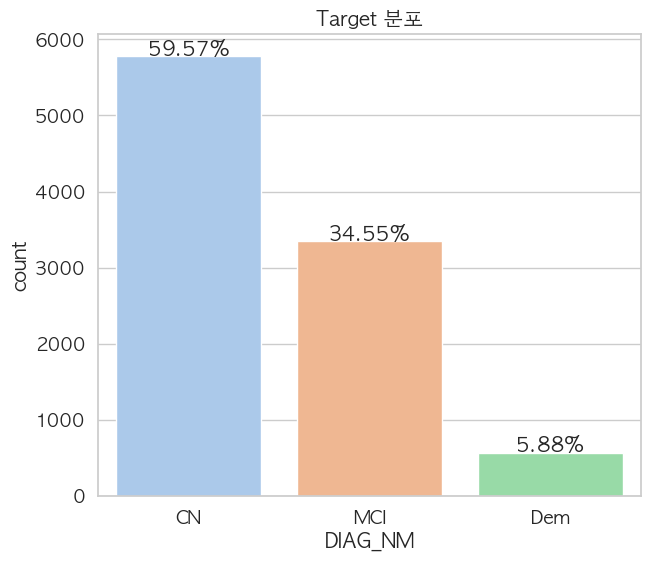

In [ ]:
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='DIAG_NM', data=train, hue='DIAG_NM')
write_percent(ax, len(train))
ax.set_title('Target 분포');

## <a id='toc2_2_'></a>[sleep_period_id](#toc0_)

In [94]:
# 교차분석표 생성
crosstab = pd.crosstab(train['sleep_period_id'], train['DIAG_NM'], normalize='columns').reset_index()
crosstab

DIAG_NM  sleep_period_id        CN       MCI       Dem
0                      0  0.456668  0.495676  0.516637
1                      1  0.296834  0.306889  0.232925
2                      2  0.140979  0.121086  0.143608
3                      3  0.069365  0.055174  0.078809
4                      4  0.029926  0.018193  0.019264
5                      5  0.005189  0.002684  0.007005
6                      6  0.000865  0.000298  0.001751
7                      7  0.000173  0.000000  0.000000

In [93]:
target_groups = ['CN', 'MCI', 'Dem']

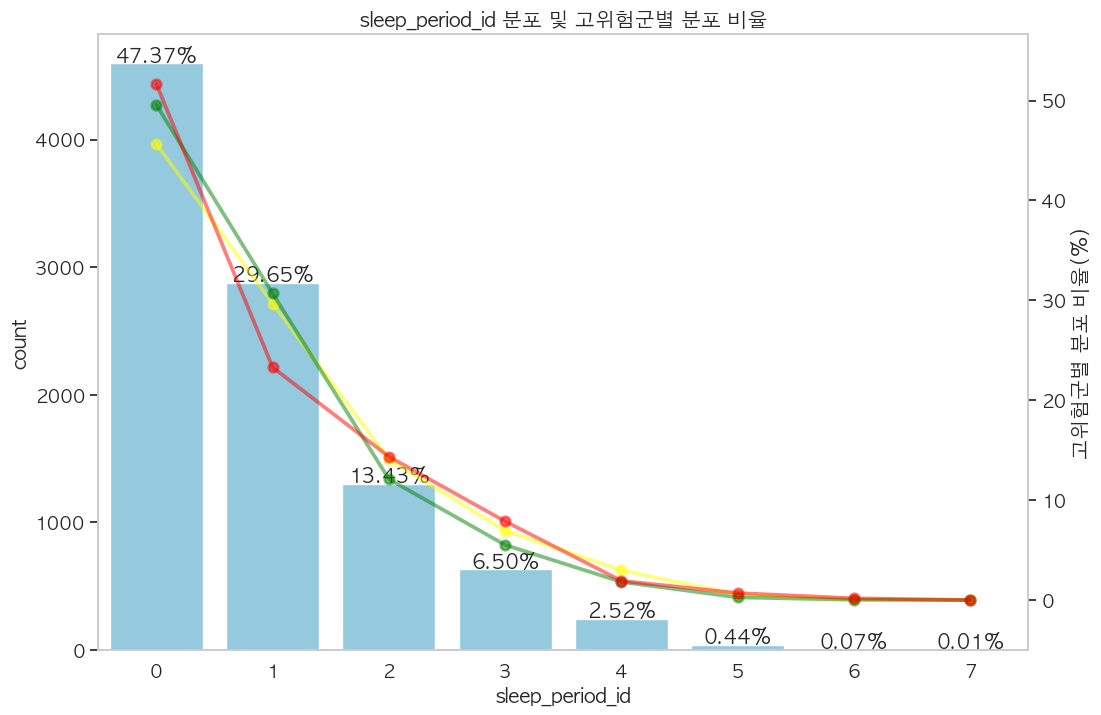

In [142]:
# 위의 과정을 함수로 만들어 놓음
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['DIAG_NM'], normalize='columns')*100
    crosstab = crosstab.reset_index()
    
    return crosstab

# 포인트플롯 함수
def plot_pointplot(ax, feature, crosstab):
    """고위험군별 비율을 포인트플롯으로 시각화하는 함수"""
    ax2 = ax.twinx()  # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    colors = {'CN': 'yellow', 'MCI': 'green', 'Dem': 'red'}

    for label, color in colors.items():
        sns.pointplot(
            x=feature, y=label, data=crosstab,
            order=crosstab[feature].values, color=color, legend=False, ax=ax2,
            alpha=0.5
        )

    ax2.set_ylim(-5, crosstab[target_groups].values.max() + 5)
    ax2.set_ylabel('고위험군별 분포 비율(%)')
    ax2.grid(False)

# 분포 및 비율 시각화 함수
def plot_with_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    """변수별 분포 및 고위험군별 비율을 동시에 시각화하는 함수"""
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols, wspace=0.45, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        # 막대 그래프 (변수 분포)
        sns.countplot(
            x=feature, data=df,
            order=crosstab[feature].values, color='skyblue', ax=ax
        )
        
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)  # 포인트 플롯 추가
        ax.set_title(f'{feature} 분포 및 고위험군별 분포 비율')
        if len(features) > 1:
            ax.tick_params(axis='x', labelrotation=20) # x축 라벨 회전
        ax.grid(False)

plot_with_ratio(train, ['sleep_period_id'], 1, 1, (12, 8))

- sleep_period_id 각 범주에서 세그룹 비율의 차이가 없음 -> 모델링에 사용 x

## <a id='toc2_3_'></a>[연속형 feature](#toc0_)

In [109]:
len(summary[summary['데이터 종류'] == '연속형'].index)

26

In [112]:
cont_features

Index(['sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest',
       'sleep_is_longest', 'sleep_light', 'sleep_midpoint_at_delta',
       'sleep_midpoint_time', 'sleep_onset_latency', 'sleep_rem',
       'sleep_restless', 'sleep_rmssd', 'sleep_score', 'sleep_score_alignment',
       'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_total'],
      dtype='object')

In [115]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index
train_copy = train.copy()

plt.figure(figsize=(12, 16))
grid = gridspec.GridSpec(5, 2, wspace=0.2, hspace=0.6)

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나눔
    train_copy[cont_feature] = pd.cut(train_copy[cont_feature], 5)

<Figure size 1200x1600 with 0 Axes>

<Figure size 1200x1600 with 0 Axes>

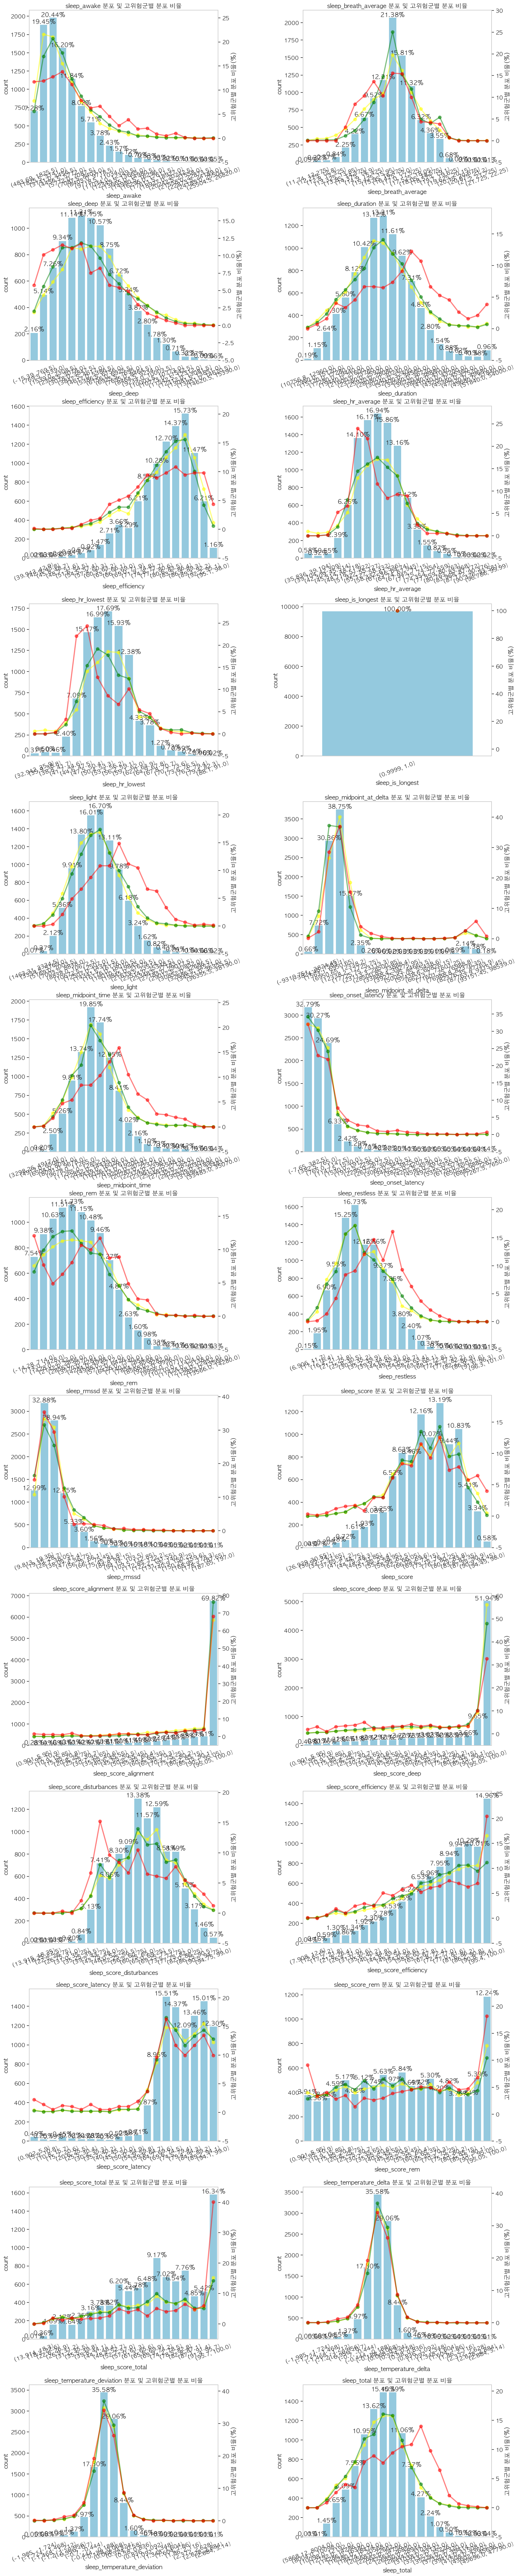

In [156]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index
train_copy = train.copy()

plt.figure(figsize=(12, 16))
grid = gridspec.GridSpec(5, 2, wspace=0.2, hspace=0.6)

train_copy[cont_features] = train_copy[cont_features].apply(lambda col: pd.cut(col, 20))
plot_with_ratio(train_copy, cont_features, 13, 2, (20, 110))

- sleep_temperature_delta, sleep_temperature_deviation 컬럼 제거

## <a id='toc2_4_'></a>[연속형 feature 2 - 피처 간 상관관계](#toc0_)

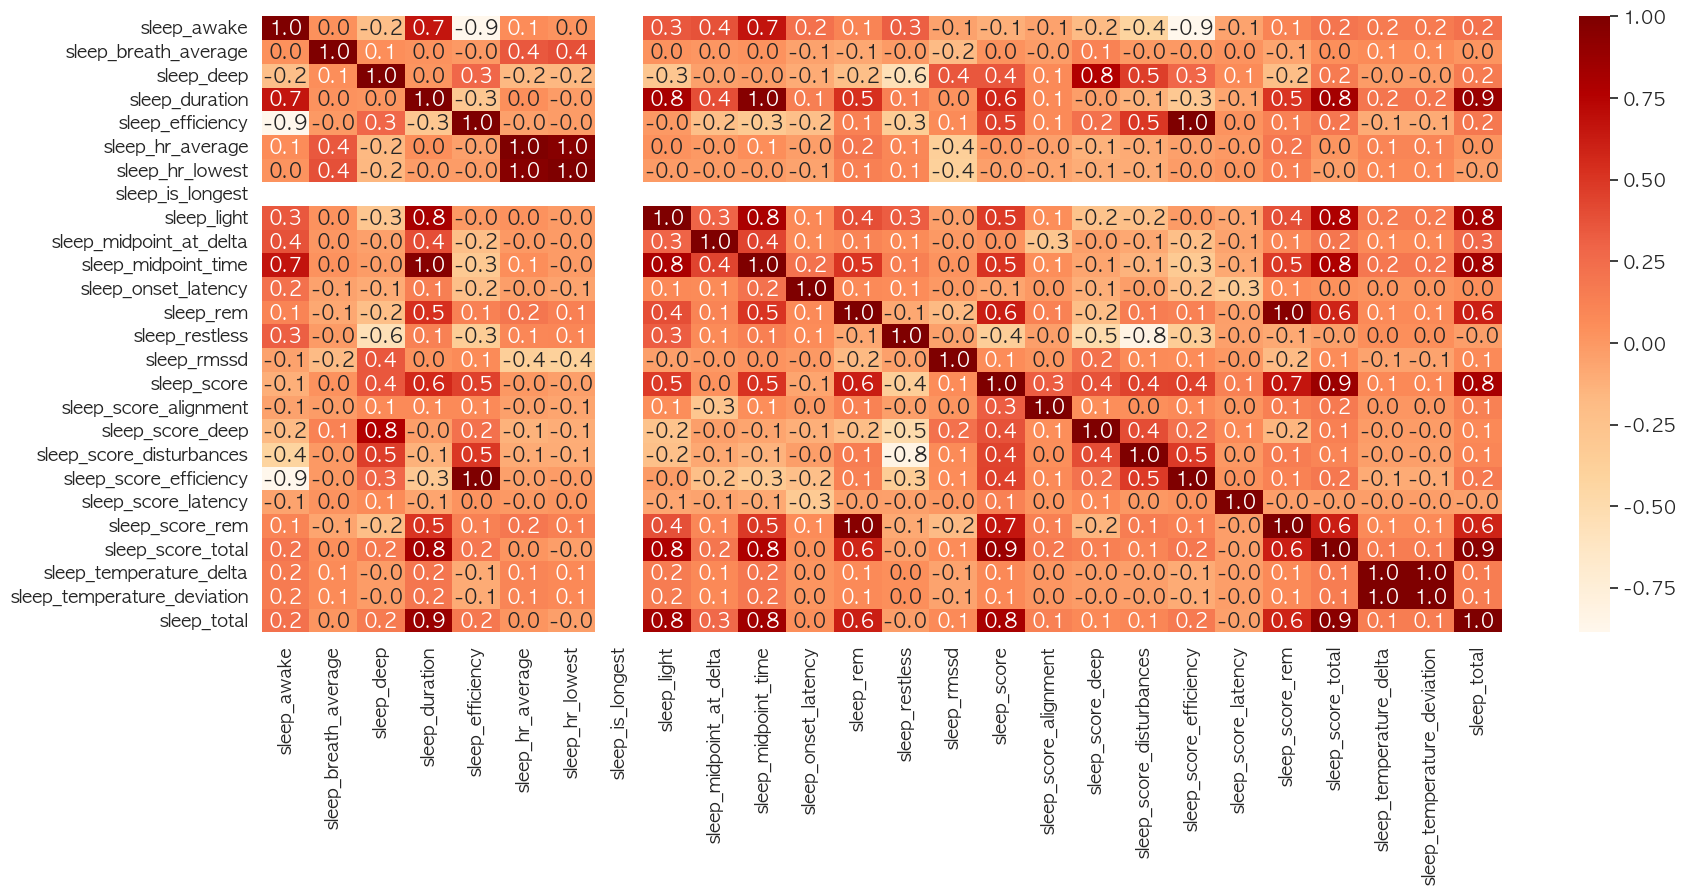

In [161]:
plt.figure(figsize=(20, 8))
cont_corr = train[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd', fmt='.1f');